# Linear regression

In this Jupyter notebook we play with the idea of solving problems by fitting a line, i.e. *linear regression*. Despite of its simplicity it is a powerful tool and you should not try other more tricky things before testing this basic wizardy.

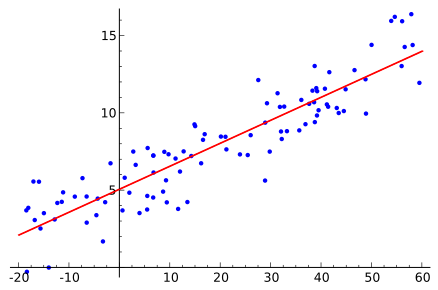

*Working Example*: We want to install stepper motors to our mobile robot, but the motor is unknown to us and we would like to know that "if I send M step commands to the motor how many millimeters it moves" - in robotics this is actually a very important problem and referred to as *dead reckoning*.

For machine learning we need to collect data - *training data* - in order to "train" a ML model. This is simple, we just calculate the number of step commands sent to the motor and then we measure the distance it moved.

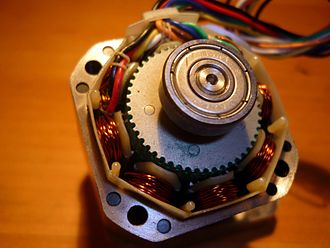

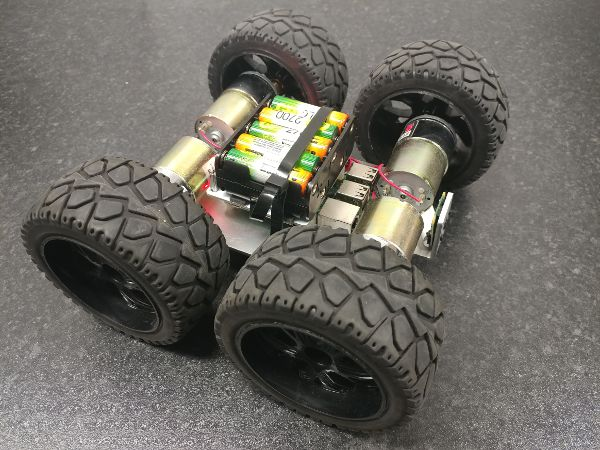

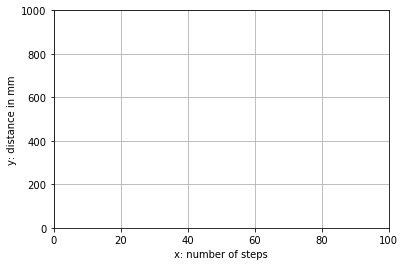

In [24]:
# We study problem in the x,y coordinate system
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel('x: number of steps')
plt.ylabel('y: distance in mm')
plt.axis([0,100,0,1000])
plt.grid(True)
plt.show()

Our model is a line:

\begin{equation}
y = ax+b \enspace .
\end{equation}

We prefer to write this in machine learning as (Bishop, 2006)

\begin{equation}
y = w_0+w_1x
\end{equation}

since we can have multiple inputs $\mathbf{x} = (x_1,x_2,x_3,\ldots)^T$ for which we can write the linear model as

\begin{equation}
y = w_0+w_1x_1+w_2x_2+\ldots + w_{M-1}x_{M-1}
\end{equation}

or more conveniently in the matrix form as

\begin{equation}
y = w_0+\mathbf{w}^T\mathbf{x} \enspace .
\end{equation}



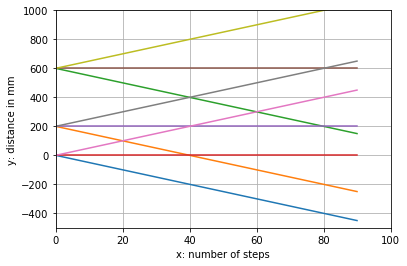

In [26]:
# Plotting different lines
plt.xlabel('x: number of steps')
plt.ylabel('y: distance in mm')
plt.axis([0,100,-500,1000])
plt.grid(True)
for a in [-5, 0, 5]:
    for b in [0, 200, 600]:
        x = np.arange(0,100,10)
        y = a * x + b
        plt.plot(x,y)

In [7]:
# We get one "training point"
(x_t, y_t) = (10,100)

ValueError: operands could not be broadcast together with shapes (10,) (4,) 

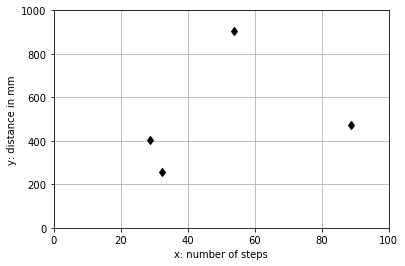

In [27]:
# Lines through the given point
plt.xlabel('x: number of steps')
plt.ylabel('y: distance in mm')
plt.axis([0,100,0,1000])
plt.grid(True)
plt.plot(x_t,y_t,'kd')
for a in [-5, 0, 5]:
    b = y_t - a * x_t
    x = np.arange(0,100,10)
    y = a*x+b
    plt.plot(x,y)

In [9]:
# We get two training points
(x_t,y_t) = ([10,50],[100, 500])

a = 10.00 b = 0.00


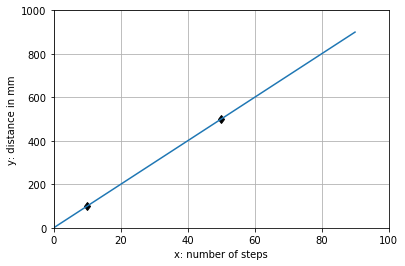

In [11]:
# We are able to solve the equation of a line that goes through two points
plt.xlabel('x: number of steps')
plt.ylabel('y: distance in mm')
plt.axis([0,100,0,1000])
plt.grid(True)
plt.plot(x_t,y_t,'kd')

# Below are the master formulas for a and b
a = (y_t[1] - y_t[0]) / (x_t[1] - x_t[0])
b = y_t[0] - a * x_t[0]
x = np.arange(0, 100, 10)
y = a * x + b
print("a = %2.2f b = %2.2f" %(a,b))
plt.plot(x,y)

<IPython.core.display.Javascript object>


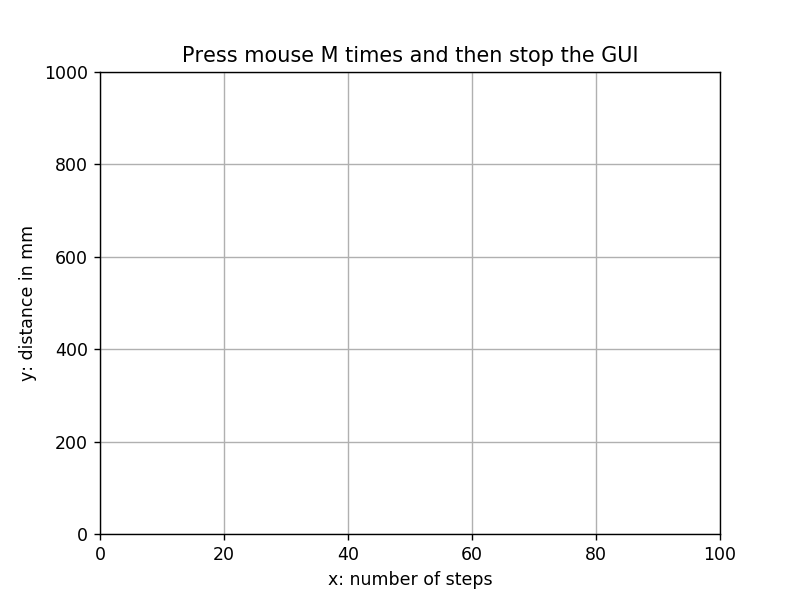

In [21]:
# Let's take a random number of points
%matplotlib notebook

fig = plt.figure()
plt.xlabel('x: number of steps')
plt.ylabel('y: distance in mm')
plt.title('Press mouse M times and then stop the GUI')
plt.axis([0,100,0,1000])
plt.grid(True)
coords = []

def onclick(event):
    if event.button == 3:
        global ix, iy
        ix, iy = event.xdata, event.ydatac

        global coords
        coords.append((ix, iy))
        
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [22]:
# Let's print the points
x_t = np.zeros(len(coords))
y_t = np.zeros(len(coords))
for idx, point in enumerate(coords):
    x_t[idx] = point[0]
    y_t[idx] = point[1]
    
print(len(coords))
print(x_t)
print(y_t)

4
[53.9238899  28.722277   88.80292216 32.35130925]
[906.89263612 403.64588287 471.28657552 257.54198677]


In [1]:
# Let's now try to manually find suitable values for a and b.
from ipywidgets import interact
%matplotlib inline

@interact(a=(-100, 100), b=(-500, 500))


def compare_predicted(a, b):
    plt.xlabel('x: number of steps')
    plt.ylabel('y: distance in mm')
    plt.axis([0,100,0,1000])
    plt.grid(True)
    plt.plot(x_t,y_t,'kd')

    x = np.arange(0,100,10)
    y = a * x + b
    print("a = %2.2f b = %2.2f" %(a,b))
    plt.plot(x,y)

    y_p = a * x_t + b
    print("True y =", y_t)
    print("Predicted y", y_
          p)

    res = y_t - y_p
    print('Residuals:')
    print(res)
    mae = sum(abs(res))/len(res)
    print('Mean Absolute Error (MAE): %f' %mae)
    mse = np.sqrt(sum((y_t - y_p) ** 2))/ len(res)
    print('Mean Squared Error (MSE): %f' %mse)

SyntaxError: invalid syntax (<ipython-input-1-5e2d85106ce9>, line 23)

## References

C.M. Bishop (2006): Pattern Recognition and Machine Learning, Chapter 3.

S.M. Sigler (1981): Gauss and the invention of least squares, The Annals of Statistics, Vol. 9, No. 3.

